# Лабораторная работа №3 (Laboratory work 3)
### Задача класстеризации - исследование красного вина (Clustering task - Red Wine Research)

--------------------------------------
### Эпилог (Epilogue):
#### Набор данных относится к красному варианту португальского вина Vinho Verde. Из-за конфиденциальности и логистических проблем доступны только физико-химические (входные данные) и "качество" вина. Также учитываем, что нет дополнительных данных, т.е. о сортах винограда, марке вина, отпускной цене вина и т.д. (The dataset refers to the red variant of the Portuguese wine Vinho Verde. Due to confidentiality and logistical issues, only the physico-chemical (input data) and "quality" of the wine are available. We also take into consideration that there is no additional data, i.e. about grape varieties, wine brand, selling price of wine, etc.)
### Цель (Goal):
#### Данные не стандартизированы, не сбалансированы. Нужно научиться классифицировать данные и сравнить методы: задачу классификации и её после метода главных компонент, сделать вывод о лучшей классификации. (The data is not standardized, not balanced. It is necessary to learn how to classify data and compare methods: the classification task and its main components after the method, to conclude about the best classification.)

-------------------------------------
## Задание 1-2 (Task 1-2)
#### Загрузка и анализ исходных данных (Downloading and analyzing input data)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('vine.dat', header=None)
df.columns =['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Density', 'PH', 'Sulphates', 'Alcohol', 'Class']
df

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,PH,Sulphates,Alcohol,Class
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.dtypes

FixedAcidity          float64
VolatileAcidity       float64
CitricAcid            float64
ResidualSugar         float64
Chlorides             float64
FreeSulfurDioxide     float64
TotalSulfurDioxide    float64
Density               float64
PH                    float64
Sulphates             float64
Alcohol               float64
Class                   int64
dtype: object

### Вывод о данных (Data conclusion):
#### В предоставленном наборе данных можно видеть Fixed Acidity (Фиксированная кислотность), Volatile Acidity (Содержание летучих кислот), Citric Acid (Лимонная кислота), Residual Sugar (Остаточный сахар), Chlorides (Хлориды), Free Sulfur Dioxide (Свободный диоксид серы), Total Sulfur Dioxide (Общий диоксид серы), Density (Плотность), PH (Водородный показатель), Sulphates (Сульфаты), Alcohol (Спирт). Class = "Качество вина" ("Wine quality").

--------------------------------------
## Задание 3 (Task 3)
#### Стандартизация (Standardization)

In [4]:
from sklearn import preprocessing
import numpy as np

In [5]:
Columns = ['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Density', 'PH', 'Sulphates', 'Alcohol']

In [6]:
scaler_std = preprocessing.StandardScaler()
x = scaler_std.fit_transform(df[Columns])
df[Columns] = x
df.dropna()
df

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,PH,Sulphates,Alcohol,Class
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,5
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,5
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,6
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,5
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,6
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,6
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,5


--------------------------------------
## Задание 5* (Task 5*)
#### Метод k-средних на основе реального числа кластеров (K-means method based on the real number of clusters)

In [7]:
from sklearn.cluster import KMeans

In [8]:
print("Number of real classes = ", len(df['Class'].unique()))

Number of real classes =  6


In [9]:
kmeans = KMeans(n_clusters = len(df['Class'].unique()), random_state = 22222)
df['new_class_real_count'] = kmeans.fit_predict(df[Columns])
df

c:\Users\Анна\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,PH,Sulphates,Alcohol,Class,new_class_real_count
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5,5
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,5,5
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,5,5
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,6,0
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,5,2
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,6,2
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,6,2
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,5,5


In [10]:
tab = pd.crosstab(df['Class'], df['new_class_real_count'], margins = False)
print(tab)

new_class_real_count    0    1    2   3   4    5
Class                                           
3                       2    1    0   0   0    7
4                       4    7    4   1   1   36
5                      97  214   45  17  28  280
6                     177   97  162   9  12  181
7                      78   11   81   1   5   23
8                       7    1   10   0   0    0


#### Таким образом, можно заметить, что наибольшую часть первого кластера составляет 5, 6 и 7 классы, второго кластера - 5 и 6, третьего - 6 и 7, четвертого - 5 и 6, пятого - 5 и 6, седьмого - тоже 5 и 6.
#### Однако нужно также проанализировать какие исходные классы в какие кластеры распределились. Третий класс - в 6 кластер, четвертый - в 6, пятый - во 2 и 6, шестой - в 1, 3 и 6 кластеры, седьмой - в 1 и 3, восьмой - в 3.

--------------------------------------
## Задание 4 (Task 4)
### Оценка числа кластеров для метода K-means с помощью методов локтя (на основе инерции и искажения) и с помощью метрики силуэта. (Estimate the number of clusters for the K-means method using the elbow methods (based on inertia and distortion) and using the silhouette metric.)
#### Справочная информация по метрикам:
#### Инерция – это среднее квадратов расстояний от центров кластеров соответствующих кластеров.
#### Искажение - это сумма квадратов минимальных расстояний от образцов до центров кластеров (если перебирать все центры).

In [11]:
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

In [12]:
rg = range(2, 15)
inertia = []
distortion = []
silhouette = []
for k in rg:
    kmeans = KMeans(n_clusters = k, random_state = 22222).fit(df[Columns])
    inertia.append(kmeans.inertia_)
    distortion.append(sum(np.min(cdist(
        df[Columns],
        kmeans.cluster_centers_,
            'euclidean'),axis = 1))/df.shape[0])
    preds = kmeans.predict(df[Columns])
    silhouette.append(silhouette_score(df[Columns],preds))
print("Инерция = ",inertia)
print("Искажение = ",distortion)
print("Силуэт = ",silhouette)

c:\Users\Анна\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Анна\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Анна\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Анна\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

Инерция =  [14330.119811335493, 12629.97459173265, 11295.595411117692, 10155.374026344622, 9364.110057548172, 8644.999485690038, 8299.387831231094, 7968.24931205101, 7697.024207950533, 7468.329749412831, 7261.051218530156, 7011.059497883893, 6807.059473136032]
Искажение =  [2.707230304294525, 2.5269423055913953, 2.4427719196848776, 2.311871877367146, 2.2542968990851686, 2.1625343316179353, 2.114193178916736, 2.0652432480013947, 2.0383472822942355, 2.0230746310648766, 1.981199921416795, 1.957252142894448, 1.9264455349057445]
Силуэт =  [0.2137299633550709, 0.18920406811092624, 0.20529466467386603, 0.19026993359271968, 0.19204851011162904, 0.19161525446413868, 0.1503326063143737, 0.1539977008970477, 0.1543189016113851, 0.1591282293343902, 0.13025573874677807, 0.14148637917529044, 0.14696184528795392]


### График для метода локтя для инерции

In [13]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

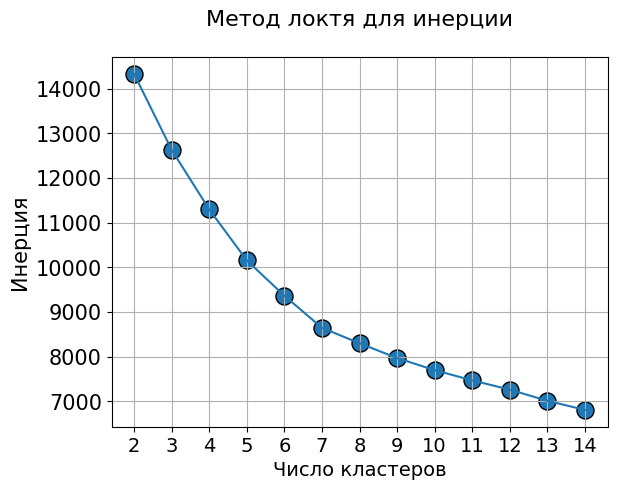

In [14]:
plt.title("Метод локтя для инерции\n",fontsize=16)
plt.scatter(x=[i for i in rg],y=inertia,s=150,edgecolor='k')
plt.plot(rg, inertia);
plt.grid(True)
plt.xlabel("Число кластеров",fontsize=14)
plt.ylabel("Инерция",fontsize=15)
plt.xticks([i for i in rg],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

### График для метода локтя для искажения

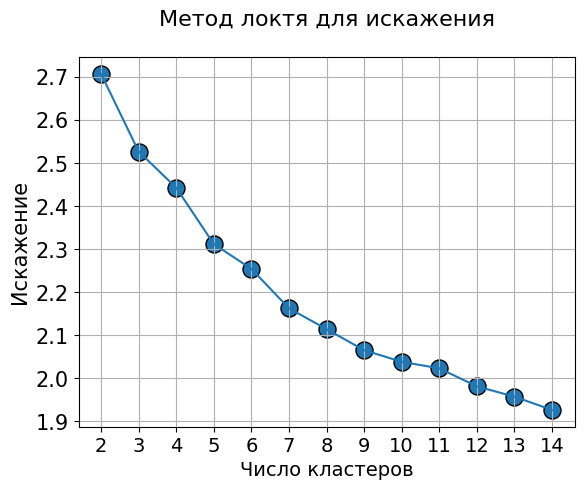

In [15]:
plt.title("Метод локтя для иcкажения\n",fontsize=16)
plt.scatter(x=[i for i in rg],
y=distortion,s=150,edgecolor='k')
plt.plot(rg, distortion);
plt.grid(True)
plt.xlabel("Число кластеров",fontsize=14)
plt.ylabel("Искажение",fontsize=15)
plt.xticks([i for i in rg],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

### Вывод: На обоих графиках видно, что после точки 7 график приближается к прямой. Это означает, что 7 – оптимальное число кластеров. Можно сказать, что метод локтя дал правильный ответ. Причём метод локтя на основе инерции даёт более очевидный ответ, так как на нём точки 8-14 больше вписываются в прямую, чем на графике на основе искажения.

### График для метрики силуэта

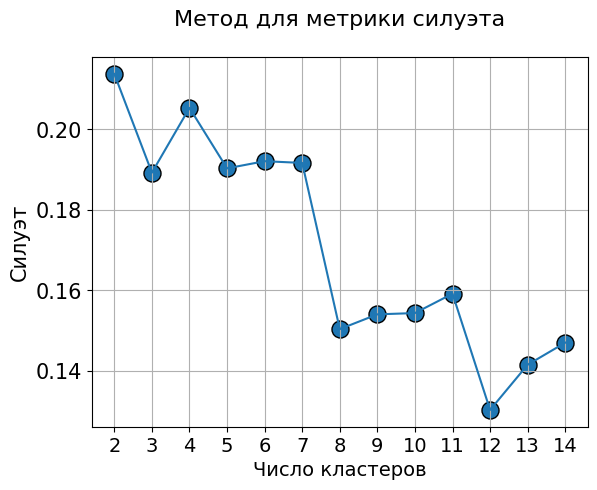

In [16]:
plt.title("Метод для метрики силуэта\n",fontsize=16)
plt.scatter(x=[i for i in rg],
y=silhouette,s=150,edgecolor='k')
plt.plot(rg, silhouette);
plt.grid(True)
plt.xlabel("Число кластеров",fontsize=14)
plt.ylabel("Силуэт",fontsize=15)
plt.xticks([i for i in rg],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.213941745878211


InvalidIndexError: (slice(None, None, None), 0)

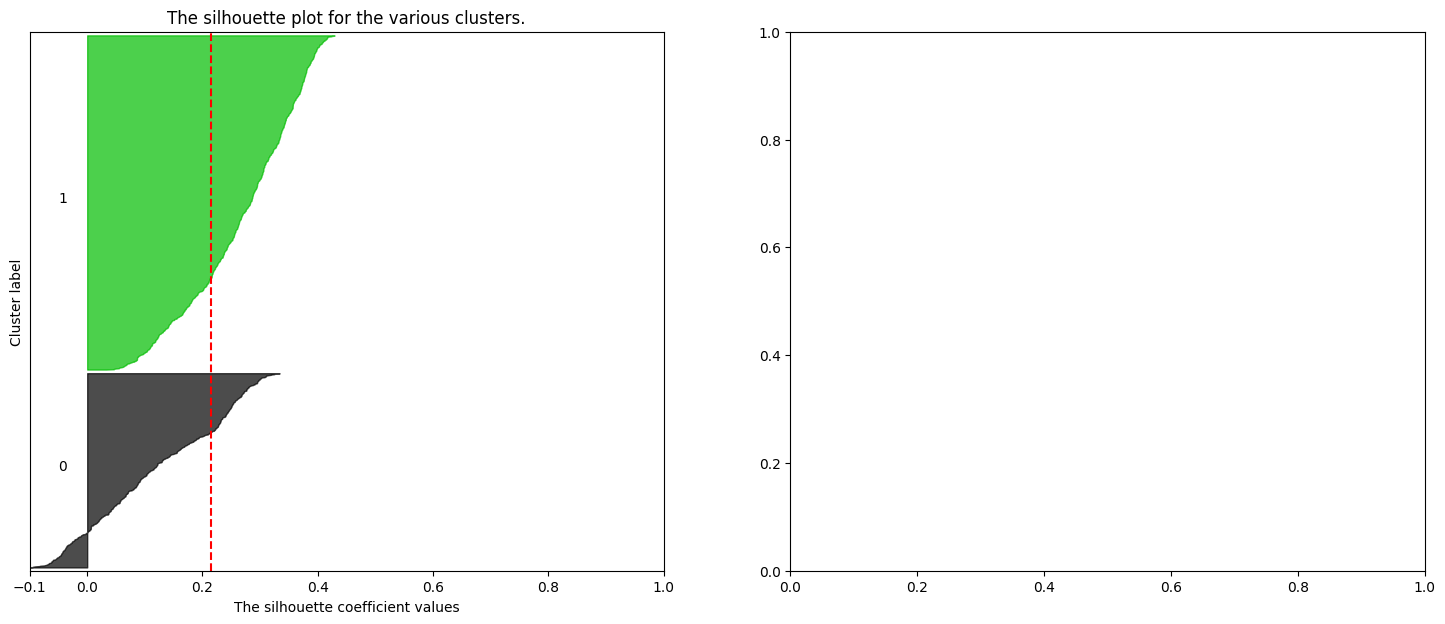

In [17]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
# X, y = make_blobs(
#     n_samples=500,
#     n_features=2,
#     centers=4,
#     cluster_std=1,
#     center_box=(-10.0, 10.0),
#     shuffle=True,
#     random_state=1,
# )  # For reproducibility

n_samples = df.shape[0]
n_features = 11
X = df[Columns]

# range_n_clusters = [2, 3, 4, 5, 6] ->rg

for n_clusters in rg:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

### Вывод: Если судить только по данному графику, то оптимальное число кластеров – 2 (наибольшее значение). Это связано с тем, что в данной задаче данные не сбалансированы и классы 5 и 6 имеют наибольшее число объектов.
### С другой стороны, в задачах с неперемешанными кластерами метод локтя обычно проигрывает по ясности методу силуэта

In [18]:
print("Number of real classes = ", len(df['Class'].unique()))

Number of real classes =  6


### Вывод: При сравнении реального количества исходных классов и полученного количества кластеров методом локтя, получаем 6 и 7 соответственно. Соответственно, можно сказать, что метод локтя выявил еще один класс. Дальнейший анализ определит целесообразность рассчитанного количества кластеров.

--------------------------------------
## Задание 5 (Task 5)
#### Метод k-средних на основе числа кластеров, выявленных методом локтя (K-means method based on the number of clusters identified by the elbow method)

In [19]:
from sklearn.cluster import KMeans

In [20]:
kmeans = KMeans(n_clusters = 7, random_state = 22222)
df['new_class_elbow_method'] = kmeans.fit_predict(df[Columns])
df

c:\Users\Анна\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,PH,Sulphates,Alcohol,Class,new_class_real_count,new_class_elbow_method
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5,5,0
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,5,5,0
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,5,5,0
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,6,0,3
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,5,2,4
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,6,2,4
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,6,2,4
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,5,5,4


In [21]:
tab = pd.crosstab(df['Class'], df['new_class_elbow_method'], margins = False)
print(tab)

new_class_elbow_method    0    1    2    3    4   5   6
Class                                                  
3                         7    1    0    2    0   0   0
4                        32    4    2    4    9   1   1
5                       279  226   24   83   35  16  18
6                       168   95  121  122  111  12   9
7                        19    9   89   50   26   5   1
8                         0    0   10    4    4   0   0


#### Таким образом, можно заметить, что наибольшую часть первого кластера составляет 5, 6 классы, второго кластера - 5 и 6, третьего - 6 и 7, четвертого - 5 и 6, пятого - 6, седьмого - 5 и 6, восьмого - 5 и 6.
#### Однако нужно также проанализировать какие исходные классы в какие кластеры распределились. 3 класс преимущественно - в первый кластер, 4 - в первый, 5 - в первый и второй, 6 - в первый, третий, четвертый и пятый кластеры, 7 - в третий, 9 - в третий.

--------------------------------------
## Задание 6 (Task 6)
#### Дендрограмма по методу Уорда (Dendrogram by Ward 's method)

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

In [23]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1 # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_,counts]).astype(float)
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

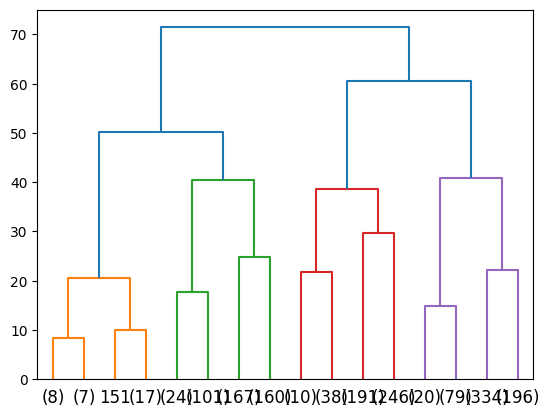

In [24]:
ag = AgglomerativeClustering(linkage = 'ward', n_clusters = None,
distance_threshold = 0)
model = ag.fit(df[Columns])
plot_dendrogram(model, truncate_mode = 'level', p = 3)
plt.show()

## Реальное число классов 6, число классов по дендрограмме - 4.

## Задание 7 (Task 7)

## Теперь проведем кластеризацию с известным колличеством классов

In [66]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd

# создаем объект AgglomerativeClustering с методом Уорда
ward = AgglomerativeClustering(n_clusters=4, linkage='ward')

df['new_class_ward_method'] = ward.fit_predict(df[Columns])
df

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,PH,Sulphates,Alcohol,Class,new_class_real_count,new_class_elbow_method,new_class_ward_method
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5,5,0,0
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,5,5,0,0
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,5,5,0,0
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,6,0,3,2
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,5,2,4,2
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,6,2,4,2
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,6,2,4,2
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,5,5,4,2


## Задание 8 (Task 8)

## Построите три раза проекцию по двум первым координатам точек набора данных, раскрасив их в различные цвета в соответствии с реальными классами, классами, предсказанными k-means, и классами, предсказанными методом Уорда.

### Задаем цвета в соответствии с номером классов

In [67]:
colors_map = {'1': 'red', '2': 'green', '3': 'blue', '4': 'grey', '5': 'orange', '6': 'pink', '0': 'yellow'}

#Копируем датафрейм
df1 = df.copy()

# df1['color'] = df['Class']
# df1['color'] = df1['Class'].apply(lambda x: colors_map[x])
df1['Class'] = df['Class'].astype(str).map(colors_map)
df1['new_class_real_count'] = df['new_class_real_count'].astype(str).map(colors_map)
df1['new_class_ward_method'] = df['new_class_ward_method'].astype(str).map(colors_map)
titles = ['FixedAcidity', 'VolatileAcidity']

In [27]:
#df1['color']

In [68]:
df1

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,PH,Sulphates,Alcohol,Class,new_class_real_count,new_class_elbow_method,new_class_ward_method
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,orange,orange,0,yellow
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,orange,orange,0,yellow
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,orange,orange,0,yellow
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,pink,yellow,3,green
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,orange,orange,0,yellow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,orange,green,4,green
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,pink,green,4,green
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,pink,green,4,green
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,orange,orange,4,green


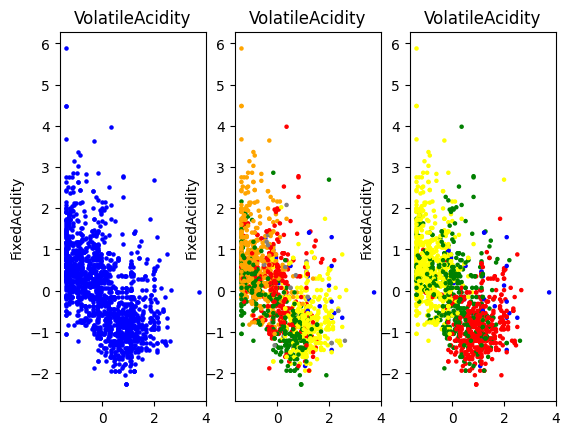

In [69]:
# centers = kmeans.cluster_centers_

y = df1.iloc[:, 1]
x = df1.iloc[:, 2]

ax = plt.subplot(1, 3, 1)
ax.set_title(titles[1])
ax.set_ylabel(titles[0])

plt.scatter(x, y, c = 'blue', s = 5) #df1['Class'] Работало, теперь не хочет, хотя сделано аналогично остальным
# plt.scatter(centers[0][2], centers[0][1], c = ['lime'], s = 200, marker = 'X')
# plt.scatter(centers[1][2], centers[1][1], c = ['lime'], s = 200, marker = 'X')
# plt.scatter(centers[2][2], centers[2][1], c = ['lime'], s = 200, marker = 'X')

ax = plt.subplot(1, 3, 2)
ax.set_title(titles[1])
ax.set_ylabel(titles[0])
plt.scatter(x, y, c = df1['new_class_real_count'], s = 5)

ax = plt.subplot(1, 3, 3)
ax.set_title(titles[1])
ax.set_ylabel(titles[0])
plt.scatter(x, y, c = df1['new_class_ward_method'], s = 5)

# plt.get_current_fig_manager().window.wm_geometry('1400x750+50+50')
plt.show()

Задание 9 (Task 9)
Примените к исходному набору данных (после стандартизации) метод главных 
компонент, выбрав компоненты, соответствующие собственным числам, большим 
1.

In [30]:
from sklearn.decomposition import PCA
pca = PCA()
table_pca = pca.fit_transform(df[['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Density', 'PH', 'Sulphates', 'Alcohol']])
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)
explained_variance = pca.explained_variance_
print(explained_variance)

[0.28173931 0.1750827  0.1409585  0.11029387 0.08720837 0.05996439
 0.05307193 0.03845061 0.0313311  0.01648483 0.00541439]
[3.10107182 1.92711489 1.55151379 1.21399175 0.95989238 0.66002104
 0.58415655 0.42322138 0.34485779 0.18144664 0.05959558]


Выбираем первые четыре показателя.

In [39]:
df2=df[['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 'Class']]
Columns2 = ['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 'Class']
df2

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Class
0,-0.528360,0.961877,-1.391472,-0.453218,5
1,-0.298547,1.967442,-1.391472,0.043416,5
2,-0.298547,1.297065,-1.186070,-0.169427,5
3,1.654856,-1.384443,1.484154,-0.453218,6
4,-0.528360,0.961877,-1.391472,-0.453218,5
...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,5
1595,-1.390155,0.123905,-0.877968,-0.240375,6
1596,-1.160343,-0.099554,-0.723916,-0.169427,6
1597,-1.390155,0.654620,-0.775267,-0.382271,5


## Задание 10 (Task 10)
### Повторите для модифицированного набора данных шаги 4-9

 Оценка числа кластеров для метода K-means с помощью методов локтя (на основе инерции и искажения) и с помощью метрики силуэта. 

In [43]:
rg = range(2, 15)
inertia = []
distortion = []
silhouette = []
for k in rg:
    kmeans = KMeans(n_clusters = k, random_state = 22222).fit(df2[Columns2])
    inertia.append(kmeans.inertia_)
    distortion.append(sum(np.min(cdist(
        df2[Columns2],
        kmeans.cluster_centers_,
            'euclidean'),axis = 1))/df2.shape[0])
    preds = kmeans.predict(df2[Columns2])
    silhouette.append(silhouette_score(df2[Columns2],preds))
print("Инерция = ",inertia)
print("Искажение = ",distortion)
print("Силуэт = ",silhouette)

c:\Users\Анна\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Анна\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Анна\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Анна\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

Инерция =  [5002.023031290132, 4112.015481704774, 3506.3737012639813, 3135.7632191803814, 2845.1073420475436, 2622.349356677122, 2434.4118789716094, 2288.405888768031, 2161.5868149034422, 2029.222682461495, 1955.2357437317698, 1863.5909939082712, 1796.083739658597]
Искажение =  [1.5454765541747855, 1.4612846052211712, 1.3446205063134842, 1.2698970174285935, 1.201445156588347, 1.1765189592563432, 1.1250273224445744, 1.087375819688527, 1.0572058472107262, 1.0256617067330749, 1.0024175354633131, 0.9732792667474613, 0.9497899442645944]
Силуэт =  [0.33421139387886506, 0.344344582671425, 0.25999105933352695, 0.2148747792347544, 0.21899581455502712, 0.22733245955212675, 0.21884242482708974, 0.20965848477353627, 0.20854072852325967, 0.22304215436323088, 0.21233436883480697, 0.2146017379441544, 0.2145081532665723]


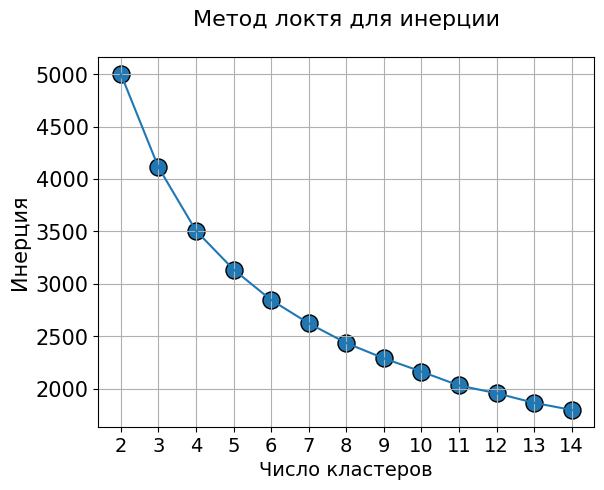

In [44]:
plt.title("Метод локтя для инерции\n",fontsize=16)
plt.scatter(x=[i for i in rg],y=inertia,s=150,edgecolor='k')
plt.plot(rg, inertia);
plt.grid(True)
plt.xlabel("Число кластеров",fontsize=14)
plt.ylabel("Инерция",fontsize=15)
plt.xticks([i for i in rg],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

### График для метода локтя для искажения

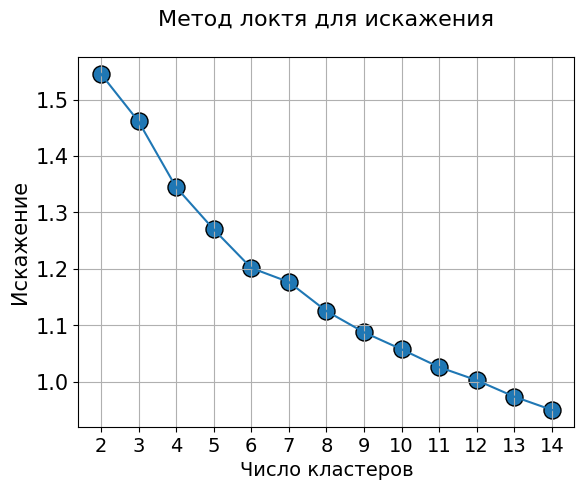

In [45]:
plt.title("Метод локтя для иcкажения\n",fontsize=16)
plt.scatter(x=[i for i in rg],
y=distortion,s=150,edgecolor='k')
plt.plot(rg, distortion);
plt.grid(True)
plt.xlabel("Число кластеров",fontsize=14)
plt.ylabel("Искажение",fontsize=15)
plt.xticks([i for i in rg],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

### Вывод: На обоих графиках видно, что после точки 6 график приближается к прямой. Это означает, что 6 – оптимальное число кластеров. Можно сказать, что метод локтя дал правильный ответ. Причём метод локтя на основе инерции даёт более очевидный ответ, так как на нём точки 7-14 больше вписываются в прямую, чем на графике на основе искажения.

### График для метрики силуэта

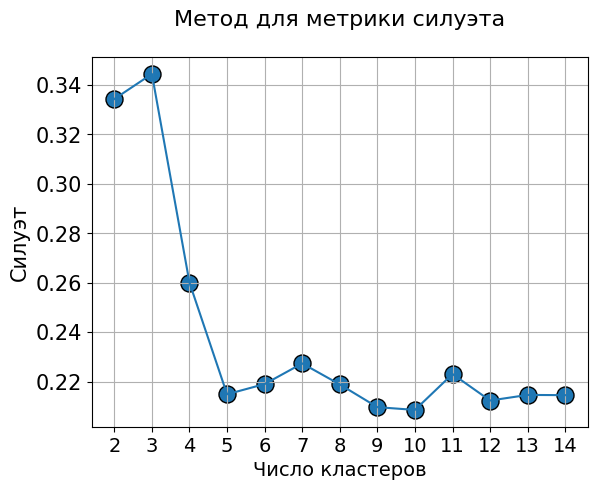

In [46]:
plt.title("Метод для метрики силуэта\n",fontsize=16)
plt.scatter(x=[i for i in rg],
y=silhouette,s=150,edgecolor='k')
plt.plot(rg, silhouette);
plt.grid(True)
plt.xlabel("Число кластеров",fontsize=14)
plt.ylabel("Силуэт",fontsize=15)
plt.xticks([i for i in rg],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

### Вывод: Если судить только по данному графику, то оптимальное число кластеров – 3 (наибольшее значение). Это связано с тем, что у нас 4 признака, и один из них является не сильно значимым.

In [47]:
print("Number of real classes = ", len(df2['Class'].unique()))

Number of real classes =  6


### Вывод: При сравнении реального количества исходных классов и полученного количества кластеров методом локтя, получаем 6 соответственно. Соответственно, колочиство кластеров соответствует реальному количеству классов.

#### Метод k-средних на основе числа кластеров, выявленных методом локтя

In [56]:
kmeans = KMeans(n_clusters = 6, random_state = 22222)
df2['new_class_elbow_method'] = kmeans.fit_predict(df2[Columns2])
df2

c:\Users\Анна\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Анна\AppData\Local\Temp\ipykernel_3252\2235546252.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['new_class_elbow_method'] = kmeans.fit_predict(df2[Columns2])


,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Class,new_class_real_count,new_class_elbow_method,new_class_ward_method
0,-0.528360,0.961877,-1.391472,-0.453218,5,0,0,4
1,-0.298547,1.967442,-1.391472,0.043416,5,0,0,1
2,-0.298547,1.297065,-1.186070,-0.169427,5,0,0,4
3,1.654856,-1.384443,1.484154,-0.453218,6,4,4,2
4,-0.528360,0.961877,-1.391472,-0.453218,5,0,0,4
...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,5,2,2,4
1595,-1.390155,0.123905,-0.877968,-0.240375,6,2,2,4
1596,-1.160343,-0.099554,-0.723916,-0.169427,6,2,2,4
1597,-1.390155,0.654620,-0.775267,-0.382271,5,2,2,4


In [58]:
tab2 = pd.crosstab(df2['Class'], df2['new_class_real_count'], margins = False)
print(tab2)

new_class_real_count    0    1    2    3    4   5
Class                                            
3                       7    0    0    2    1   0
4                      28    0    7   12    4   2
5                     141   13  156  275   66  30
6                      50  145  224   84  122  13
7                       1  101   37    0   45  15
8                       0   10    3    0    4   1


#### Таким образом, можно заметить, что наибольшую часть первого кластера составляет 5 класс, второго кластера - 6 и 7, третьего - 5 и 6, четвертого - 5, пятого - 6, шестого - 5.
#### Однако нужно также проанализировать какие исходные классы в какие кластеры распределились. 3 класс преимущественно - в первый кластер, 4 - в первый, 5 - в четвертый, 6 - в третий, 7 - во второй, 8 - во второй.

#### Дендрограмма по методу Уорда

In [50]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1 # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_,counts]).astype(float)
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

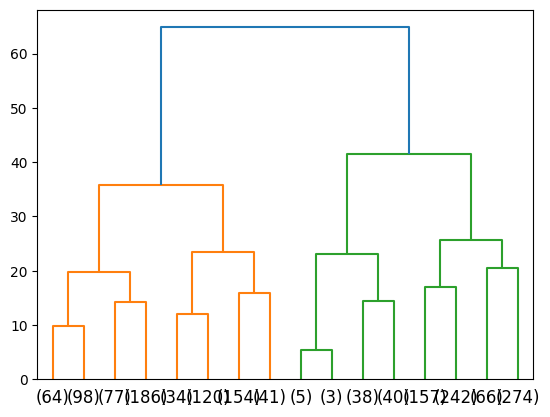

In [65]:
ag = AgglomerativeClustering(linkage = 'ward', n_clusters = None,
distance_threshold = 0)
model = ag.fit(df2[Columns2])
plot_dendrogram(model, truncate_mode = 'level', p = 3)
plt.show()

## Реальное число классов 6, число классов по дендрограмме - 2.

## Теперь проведем кластеризацию с известным колличеством классов

In [71]:
# создаем объект AgglomerativeClustering с методом Уорда
ward = AgglomerativeClustering(n_clusters=2, linkage='ward')

df2['new_class_ward_method2'] = ward.fit_predict(df2[Columns2])
df2

C:\Users\Анна\AppData\Local\Temp\ipykernel_3252\2205360891.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['new_class_ward_method2'] = ward.fit_predict(df2[Columns2])


,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Class,new_class_real_count,new_class_elbow_method,new_class_ward_method,new_class_ward_method2
0,-0.528360,0.961877,-1.391472,-0.453218,5,0,0,0,0
1,-0.298547,1.967442,-1.391472,0.043416,5,0,0,0,0
2,-0.298547,1.297065,-1.186070,-0.169427,5,0,0,0,0
3,1.654856,-1.384443,1.484154,-0.453218,6,4,4,1,1
4,-0.528360,0.961877,-1.391472,-0.453218,5,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,5,2,2,0,0
1595,-1.390155,0.123905,-0.877968,-0.240375,6,2,2,0,0
1596,-1.160343,-0.099554,-0.723916,-0.169427,6,2,2,0,0
1597,-1.390155,0.654620,-0.775267,-0.382271,5,2,2,0,0


## Построите три раза проекцию по двум первым координатам точек набора данных, раскрасив их в различные цвета в соответствии с реальными классами, классами, предсказанными k-means, и классами, предсказанными методом Уорда.

### Задаем цвета в соответствии с номером классов

In [73]:
colors_map = {'1': 'red', '2': 'green', '3': 'blue', '4': 'grey', '5': 'orange', '6': 'pink', '0': 'yellow'}

#Копируем датафрейм
df21 = df2.copy()

# df1['color'] = df['Class']
# df1['color'] = df1['Class'].apply(lambda x: colors_map[x])
df21['Class'] = df2['Class'].astype(str).map(colors_map)
df21['new_class_real_count'] = df2['new_class_real_count'].astype(str).map(colors_map)
df21['new_class_ward_method'] = df2['new_class_ward_method'].astype(str).map(colors_map)
titles = ['FixedAcidity', 'VolatileAcidity']

In [74]:
df21

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Class,new_class_real_count,new_class_elbow_method,new_class_ward_method,new_class_ward_method2
0,-0.528360,0.961877,-1.391472,-0.453218,orange,yellow,0,yellow,0
1,-0.298547,1.967442,-1.391472,0.043416,orange,yellow,0,yellow,0
2,-0.298547,1.297065,-1.186070,-0.169427,orange,yellow,0,yellow,0
3,1.654856,-1.384443,1.484154,-0.453218,pink,grey,4,red,1
4,-0.528360,0.961877,-1.391472,-0.453218,orange,yellow,0,yellow,0
...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,orange,green,2,yellow,0
1595,-1.390155,0.123905,-0.877968,-0.240375,pink,green,2,yellow,0
1596,-1.160343,-0.099554,-0.723916,-0.169427,pink,green,2,yellow,0
1597,-1.390155,0.654620,-0.775267,-0.382271,orange,green,2,yellow,0


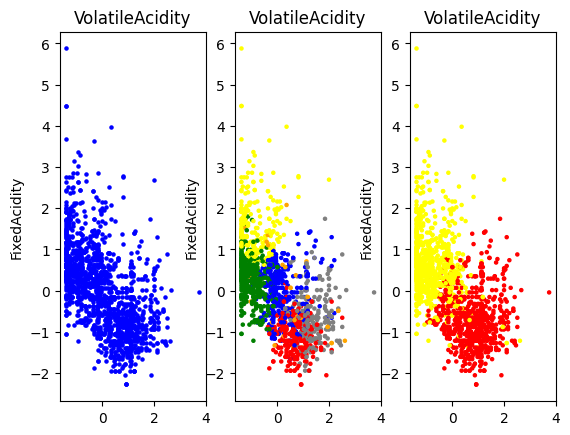

In [75]:
# centers = kmeans.cluster_centers_

y = df21.iloc[:, 1]
x = df21.iloc[:, 2]

ax = plt.subplot(1, 3, 1)
ax.set_title(titles[1])
ax.set_ylabel(titles[0])

plt.scatter(x, y, c = 'blue', s = 5) #df1['Class'] Работало, теперь не хочет, хотя сделано аналогично остальным
# plt.scatter(centers[0][2], centers[0][1], c = ['lime'], s = 200, marker = 'X')
# plt.scatter(centers[1][2], centers[1][1], c = ['lime'], s = 200, marker = 'X')
# plt.scatter(centers[2][2], centers[2][1], c = ['lime'], s = 200, marker = 'X')

ax = plt.subplot(1, 3, 2)
ax.set_title(titles[1])
ax.set_ylabel(titles[0])
plt.scatter(x, y, c = df21['new_class_real_count'], s = 5)

ax = plt.subplot(1, 3, 3)
ax.set_title(titles[1])
ax.set_ylabel(titles[0])
plt.scatter(x, y, c = df21['new_class_ward_method'], s = 5)

# plt.get_current_fig_manager().window.wm_geometry('1400x750+50+50')
plt.show()

Задание 11 (Task 11)
Дайте оценку, стала ли кластеризация точнее после применения метода главных компонент. 

В результате применения МГК, мы выделили четыре основных признака: Fixed Acidity (Фиксированная кислотность), Volatile Acidity (Содержание летучих кислот), Citric Acid (Лимонная кислота), Residual Sugar (Остаточный сахар), а также убрав из рассмотрения: Chlorides (Хлориды), Free Sulfur Dioxide (Свободный диоксид серы), Total Sulfur Dioxide (Общий диоксид серы), Density (Плотность), PH (Водородный показатель), Sulphates (Сульфаты), Alcohol (Спирт). Для оценки точности кластеризации до и после применения метода главных компонент, проанализируем два графика проекций по двум первым координатам точек набора данных, в соответствии с реальными классами, классами, предсказанными k-means, и классами, предсказанными методом Уорда. Как мы можем видеть по данным графикам, кластеризация приобрела более выраженный характер.